# Data
Data ini terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugal. Kampanye-kampanye pemasaran ini dilakukan melalui panggilan telepon. Seringkali, diperlukan lebih dari satu kontak dengan klien yang sama untuk menentukan apakah produk (deposito berjangka bank) akan dipesan ('ya') atau tidak ('tidak').

Ada empat set data:
1) bank-additional-full.csv dengan semua contoh (41188) dan 20 input, diurutkan berdasarkan tanggal (Mei 2008 hingga November 2010), sangat dekat dengan data yang dianalisis dalam [Moro et al., 2014].
2) bank-additional.csv dengan 10% contoh (4119), dipilih secara acak dari 1), dan 20 input.
3) bank-full.csv dengan semua contoh dan 17 input, diurutkan berdasarkan tanggal (versi lama dari dataset ini dengan lebih sedikit input).
4) bank.csv dengan 10% contoh dan 17 input, dipilih secara acak dari 3 (versi lama dari dataset ini dengan lebih sedikit input).
Dataset terkecil disediakan untuk menguji algoritma pembelajaran mesin yang lebih komputasional (misalnya, SVM).

Tujuan klasifikasi adalah untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel y).

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("bank-full.csv", sep=";")

In [2]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
#melihat 5 data paling atas
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#melihat 5 data paling bawah
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
#melihat tipe data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [14]:
#mengecek data duplikat
df.duplicated().sum()

0

In [7]:
#mengecek missing data
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
#melihat berapa banyak output yes dan no
output = df['y'].value_counts()
print(output)

#ternyata lebih banyak output no

no     39922
yes     5289
Name: y, dtype: int64


In [13]:
#melihat kolom apa saja yang tipe datanya integer
int64_columns = df.dtypes[df.dtypes == 'int64'].index
print(int64_columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [15]:
#mengetahui korelasi tiap fitur (kolom)
corr = df.corr()
corr

C:\Users\Shafa\AppData\Local\Temp\ipykernel_4560\3265937516.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


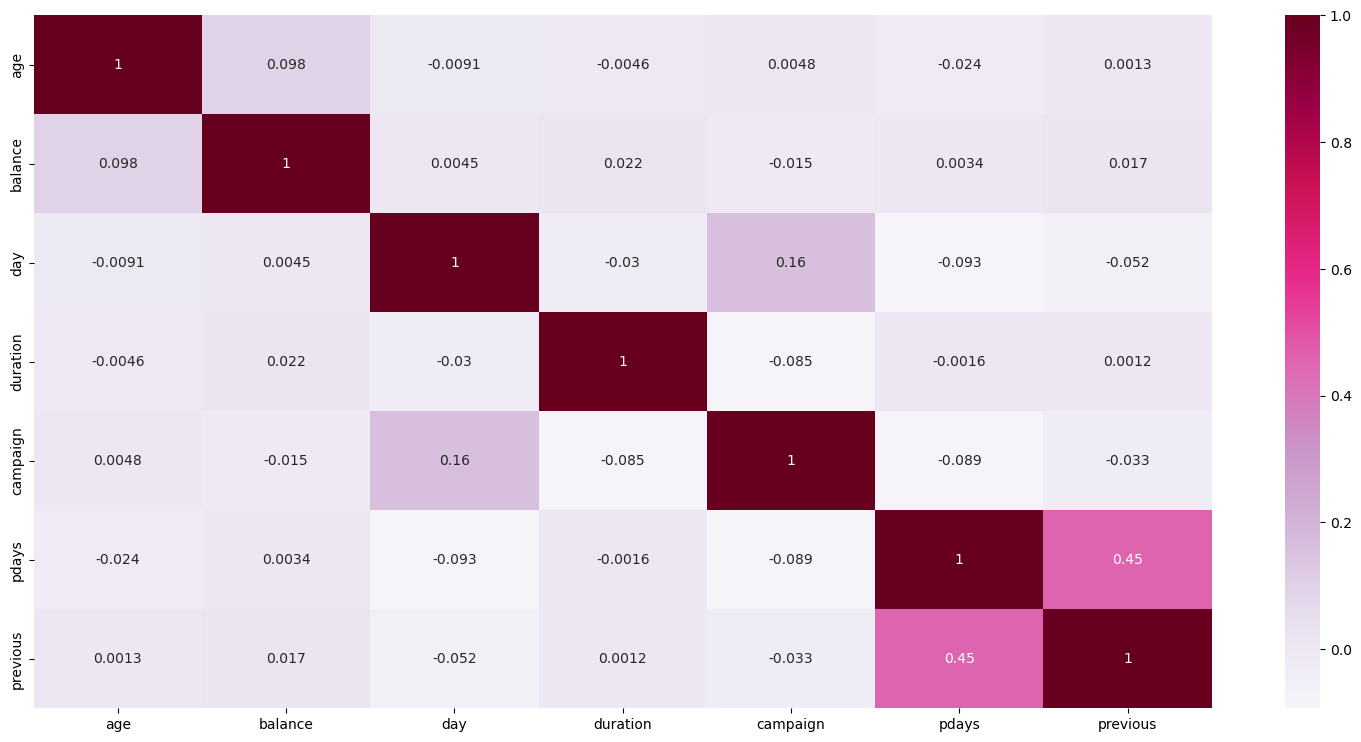

In [18]:
#plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(19, 9))
sns.heatmap(corr, cmap="PuRd", annot=True)
plt.show()

In [19]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


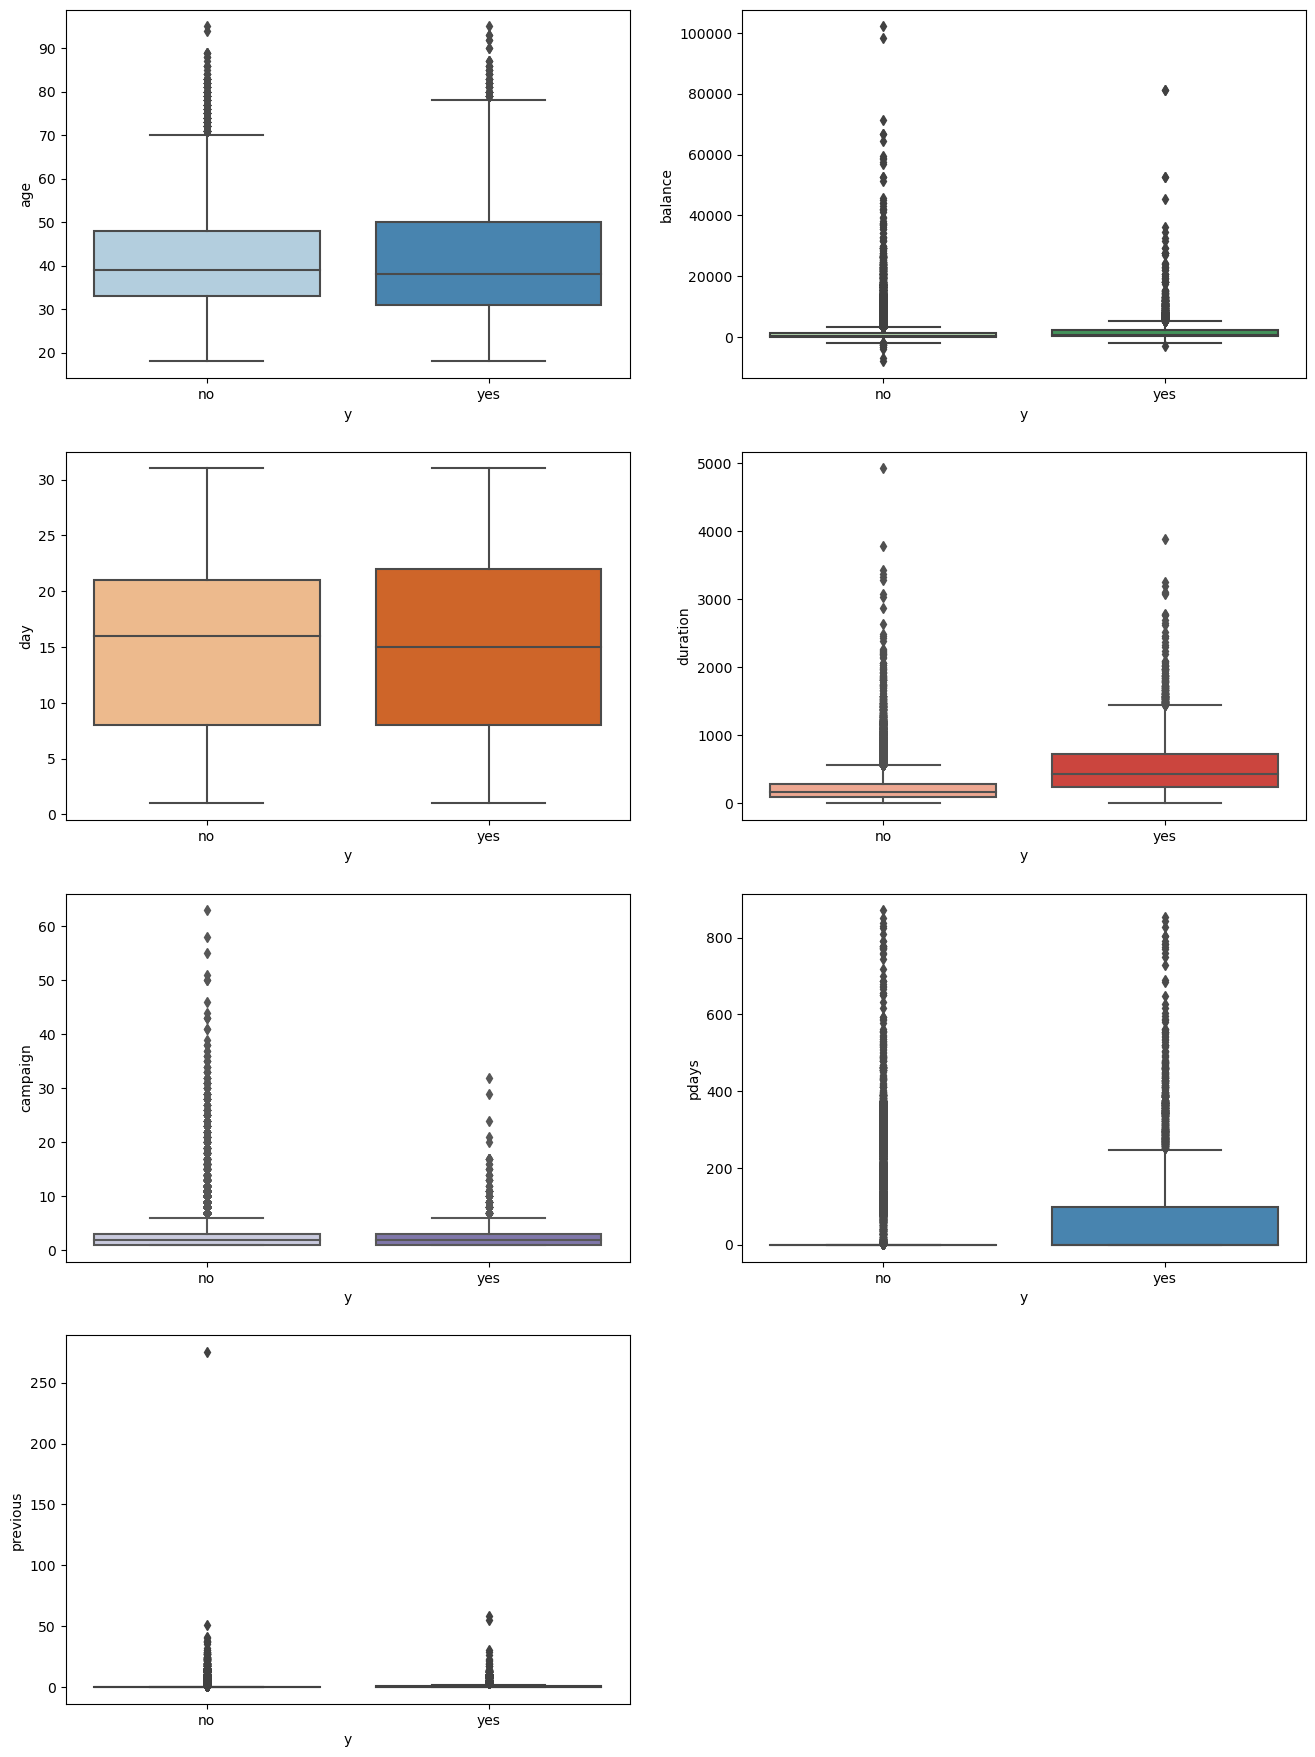

In [23]:
plt.figure(figsize=(16, 22))

# age
plt.subplot(4, 2, 1)
sns.boxplot(x="y", y="age", data=df, palette="Blues")

# balance
plt.subplot(4, 2, 2)
sns.boxplot(x="y", y="balance", data=df, palette="Greens") 

# day
plt.subplot(4, 2, 3)
sns.boxplot(x="y", y="day", data=df, palette="Oranges") 

# duration
plt.subplot(4, 2, 4)
sns.boxplot(x="y", y="duration", data=df, palette="Reds")  

# campaign
plt.subplot(4, 2, 5)
sns.boxplot(x="y", y="campaign", data=df, palette="Purples") 
# pdays
plt.subplot(4, 2, 6)
sns.boxplot(x="y", y="pdays", data=df, palette="Blues")  

# previous
plt.subplot(4, 2, 7)
sns.boxplot(x="y", y="previous", data=df, palette="Greens") 

plt.show()


In [24]:
#dari boxplot di atas, terindikasi adanya outlier pada fitur balance, duration, campaign, pdays, previous
#hitung IQR

# kuartil pertama
Q1 = df.quantile(0.25)

# kuartil ketiga
Q3 = df.quantile(0.75)

# range interkuartil
IQR = Q3 - Q1

print(IQR)

age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


C:\Users\Shafa\AppData\Local\Temp\ipykernel_4560\4102645469.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\Shafa\AppData\Local\Temp\ipykernel_4560\4102645469.py:8: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [25]:
#menguji kevalidan
lower = df < (Q1 - 1.5 * IQR)
upper = df > (Q3 + 1.5 * IQR)
print("lower\n{}\n".format(lower.any()))
print("Upper\n{}\n".format(upper.any()))

lower
age          False
balance       True
campaign     False
contact      False
day          False
default      False
duration     False
education    False
housing      False
job          False
loan         False
marital      False
month        False
pdays        False
poutcome     False
previous     False
y            False
dtype: bool

Upper
age           True
balance       True
campaign      True
contact      False
day          False
default      False
duration      True
education    False
housing      False
job          False
loan         False
marital      False
month        False
pdays         True
poutcome     False
previous      True
y            False
dtype: bool



C:\Users\Shafa\AppData\Local\Temp\ipykernel_4560\1038621366.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower = df < (Q1 - 1.5 * IQR)
C:\Users\Shafa\AppData\Local\Temp\ipykernel_4560\1038621366.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  upper = df > (Q3 + 1.5 * IQR)


In [26]:
#menghapus outlier
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\Shafa\AppData\Local\Temp\ipykernel_4560\1842016526.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [27]:
#mengecek sisa dataset
df.shape

(28193, 17)

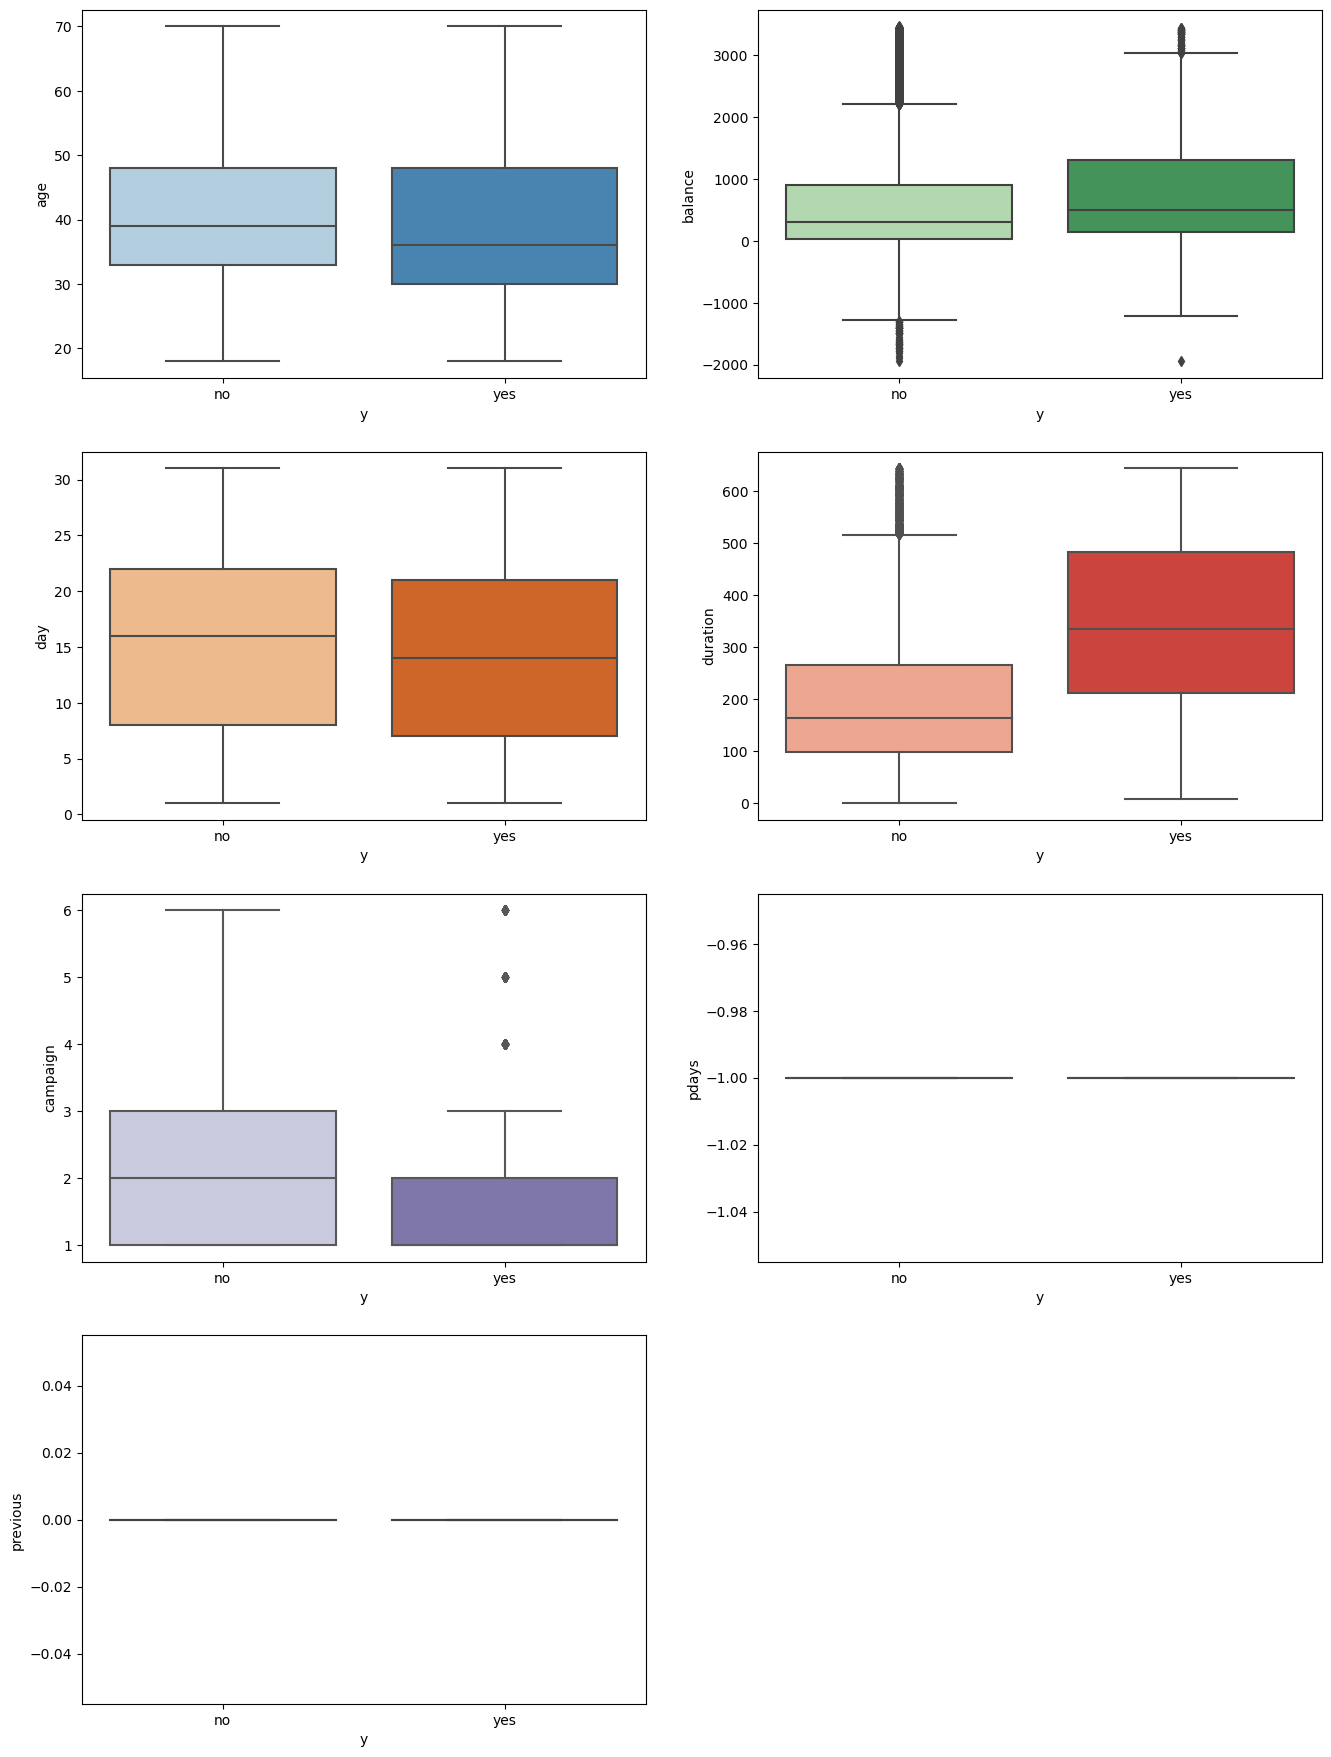

In [28]:
#melihat boxplotnya lagi
plt.figure(figsize=(16, 22))

# age
plt.subplot(4, 2, 1)
sns.boxplot(x="y", y="age", data=df, palette="Blues")

# balance
plt.subplot(4, 2, 2)
sns.boxplot(x="y", y="balance", data=df, palette="Greens") 

# day
plt.subplot(4, 2, 3)
sns.boxplot(x="y", y="day", data=df, palette="Oranges") 

# duration
plt.subplot(4, 2, 4)
sns.boxplot(x="y", y="duration", data=df, palette="Reds")  

# campaign
plt.subplot(4, 2, 5)
sns.boxplot(x="y", y="campaign", data=df, palette="Purples") 
# pdays
plt.subplot(4, 2, 6)
sns.boxplot(x="y", y="pdays", data=df, palette="Blues")  

# previous
plt.subplot(4, 2, 7)
sns.boxplot(x="y", y="previous", data=df, palette="Greens") 

plt.show()

In [29]:
#melihat kolom apa saja yang tipe datanya kategori
cat_columns = df.dtypes[df.dtypes == 'object'].index
print(cat_columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


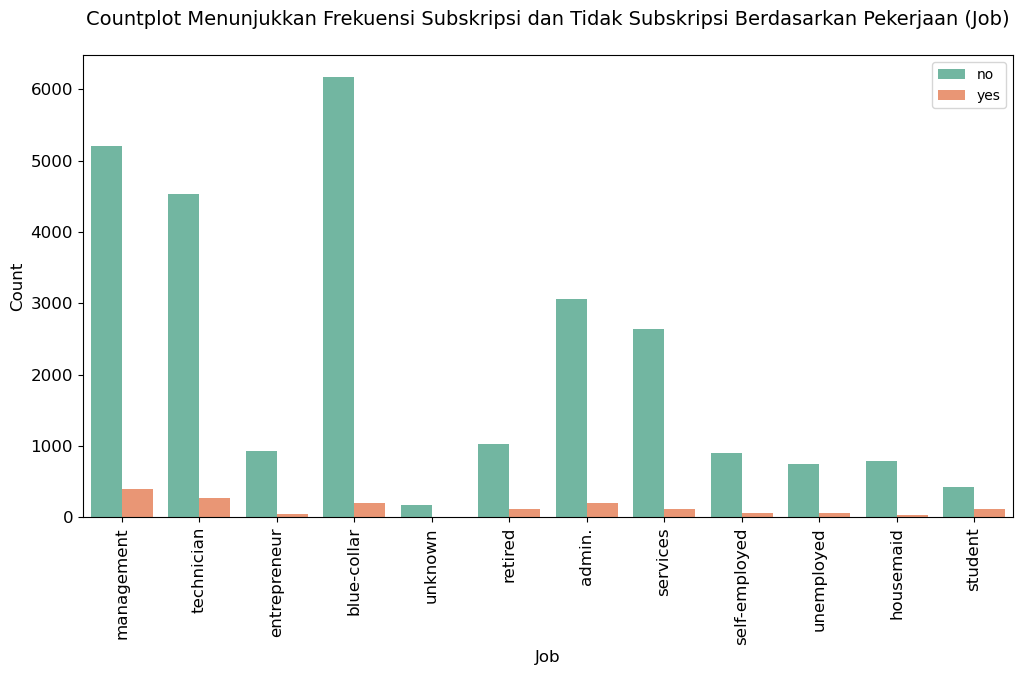

In [32]:
#visualisasi frekuensi output y berdasarkan pekerjaan (job)
plt.figure(figsize=(12, 6))
sns.countplot(x="job", hue="y", data=df, palette="Set2")
plt.xlabel("Job", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Countplot Menunjukkan Frekuensi Subskripsi dan Tidak Subskripsi Berdasarkan Pekerjaan (Job)\n", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

Countplot di atas menunjukkan bahwa customer dengan pekerjaan blue-collar paling banyak tidak memiliki deposit berjangka. Sebaliknya, pekerjaan management paling banyak memiliki deposit berjangka.

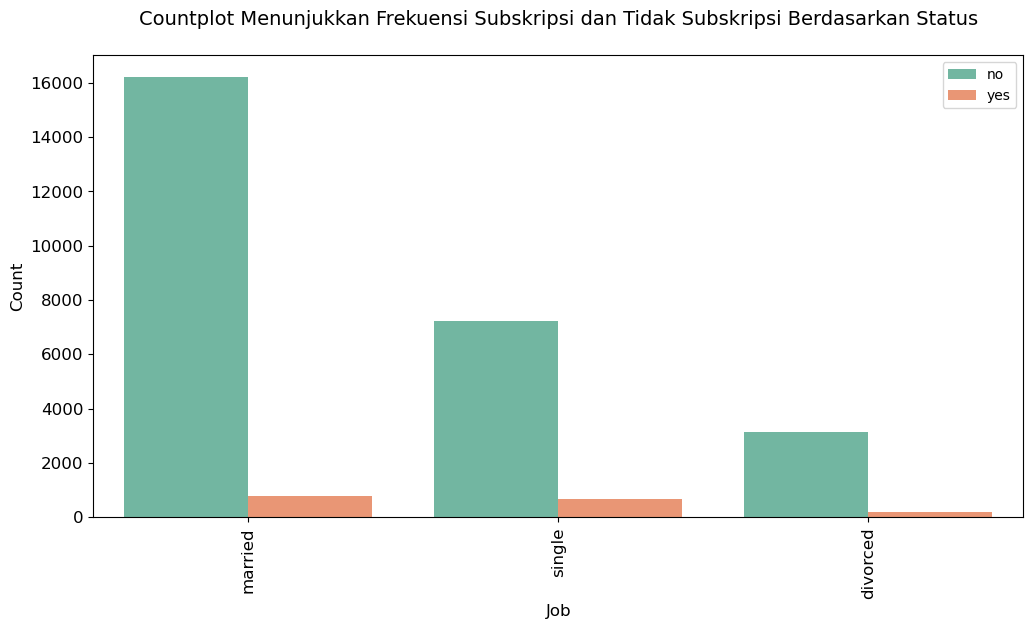

In [33]:
#visualisasi frekuensi output y berdasarkan status
plt.figure(figsize=(12, 6))
sns.countplot(x="marital", hue="y", data=df, palette="Set2")
plt.xlabel("Job", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Countplot Menunjukkan Frekuensi Subskripsi dan Tidak Subskripsi Berdasarkan Status\n", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

Countplot di atas menunjukkan bahwa customer dengan status menikah paling banyak tidak memiliki deposit berjangka. Status menikah juga paling banyak memiliki deposit berjangka.

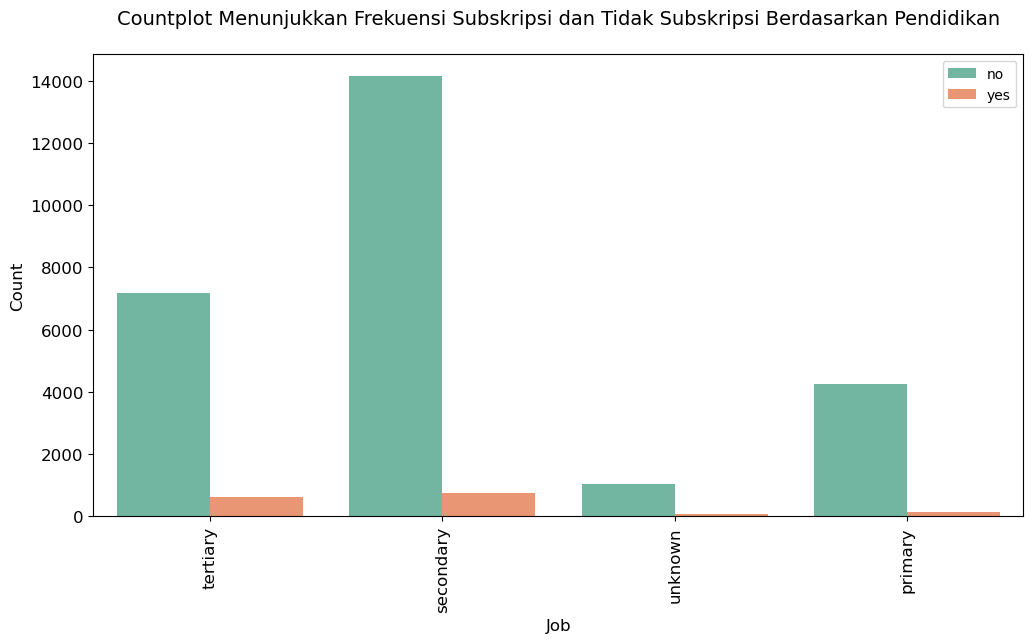

In [34]:
#visualisasi frekuensi output y berdasarkan pendidikan (education)
plt.figure(figsize=(12, 6))
sns.countplot(x="education", hue="y", data=df, palette="Set2")
plt.xlabel("Job", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Countplot Menunjukkan Frekuensi Subskripsi dan Tidak Subskripsi Berdasarkan Pendidikan\n", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

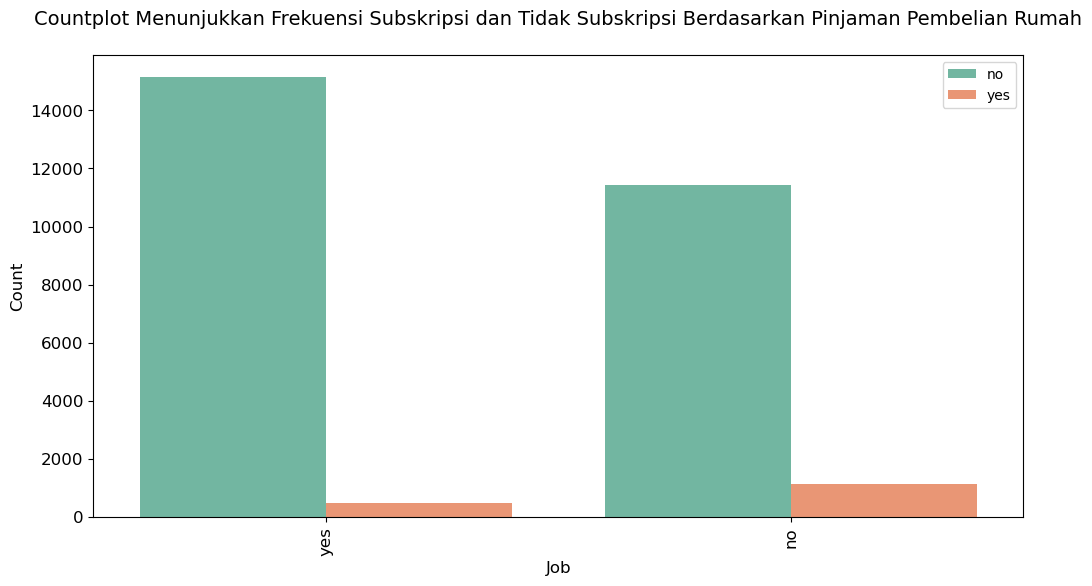

In [36]:
#visualisasi frekuensi output y berdasarkan pinjaman pembelian rumah
plt.figure(figsize=(12, 6))
sns.countplot(x="housing", hue="y", data=df, palette="Set2")
plt.xlabel("Job", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Countplot Menunjukkan Frekuensi Subskripsi dan Tidak Subskripsi Berdasarkan Pinjaman Pembelian Rumah\n", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

Countplot di atas menunjukkan bahwa customer dengan pinjaman paling banyak tidak memiliki deposit berjangka. Sedangkan, customer tanpa pinjaman paling banyak memiliki deposit berjangka.

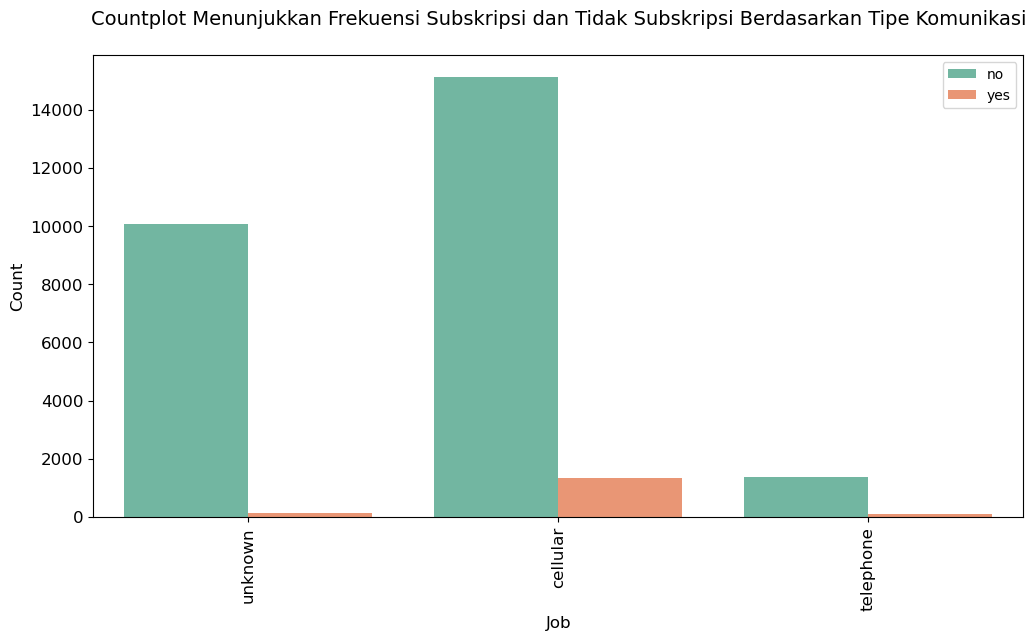

In [38]:
#visualisasi frekuensi output y berdasarkan tipe komunikasi
plt.figure(figsize=(12, 6))
sns.countplot(x="contact", hue="y", data=df, palette="Set2")
plt.xlabel("Job", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Countplot Menunjukkan Frekuensi Subskripsi dan Tidak Subskripsi Berdasarkan Tipe Komunikasi\n", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

Countplot di atas menunjukkan bahwa customer dengan tipe komunikasi cellular tidak memiliki deposit berjangka. Namun, customer dengan tipe komunikasi cellular pinjaman juga paling banyak memiliki deposit berjangka.

# Pemodelan

In [62]:
#membagi data menjadi input dan output
X = df.drop(["y", "job"], axis=1)
y = df["y"]
y

0         no
1         no
2         no
3         no
4         no
        ... 
45198     no
45202    yes
45203    yes
45205    yes
45209     no
Name: y, Length: 28193, dtype: object

In [63]:
#agar data tidak hilang, dibuat dummynya
X = pd.get_dummies(X)
X

,age,balance,day,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,1428,16,333,2,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
45202,34,557,17,224,1,-1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
45203,23,113,17,266,1,-1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
45205,25,505,17,386,2,-1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [64]:
#membagi menjadi 70% data training dan 30% data testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19735, 36)
(8458, 36)
(19735,)
(8458,)


In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

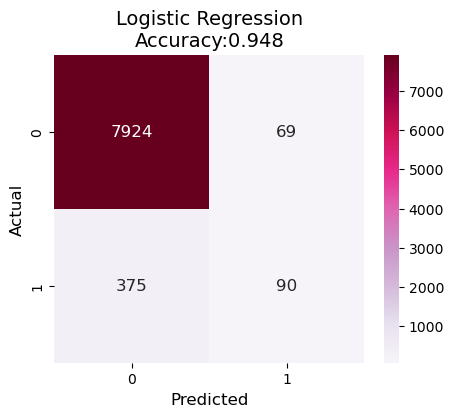

Classification Report
               precision    recall  f1-score   support

          no       0.95      0.99      0.97      7993
         yes       0.57      0.19      0.29       465

    accuracy                           0.95      8458
   macro avg       0.76      0.59      0.63      8458
weighted avg       0.93      0.95      0.94      8458



In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

#melakukan prediksi pada data testing
y_pred = model_log.predict(X_test)

#membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

#visualisasi confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Logistic Regression\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

#menampilkan classification report
print("Classification Report\n", classification_report(y_test, y_pred))

# K-Nearest Neighbor

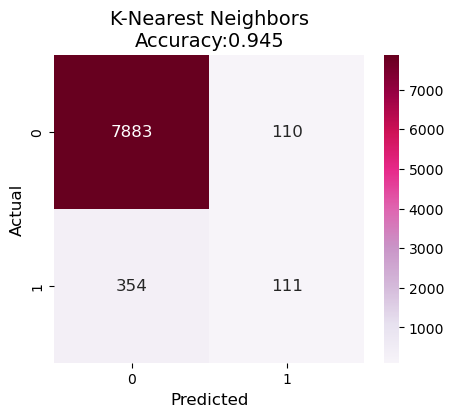

Classification Report
               precision    recall  f1-score   support

          no       0.96      0.99      0.97      7993
         yes       0.50      0.24      0.32       465

    accuracy                           0.95      8458
   macro avg       0.73      0.61      0.65      8458
weighted avg       0.93      0.95      0.94      8458



In [67]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)

#melatih model dengan data training
model_knn.fit(X_train, y_train)

#melakukan prediksi pada data testing
y_pred_knn = model_knn.predict(X_test)

#membuat confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

#visualisasi confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt=".0f", cmap="PuRd", annot_kws={"fontsize": 12})
plt.title("K-Nearest Neighbors\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_knn)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

#menampilkan classification report
print("Classification Report\n", classification_report(y_test, y_pred_knn))

# SVM

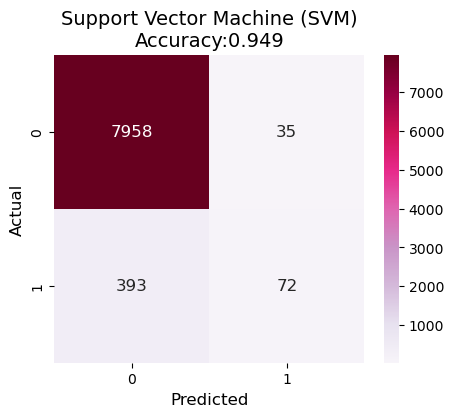

Classification Report:
               precision    recall  f1-score   support

          no       0.95      1.00      0.97      7993
         yes       0.67      0.15      0.25       465

    accuracy                           0.95      8458
   macro avg       0.81      0.58      0.61      8458
weighted avg       0.94      0.95      0.93      8458



In [70]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train, y_train)

#melakukan prediksi pada data testing
y_pred = model_svm.predict(X_test)

#membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

#visualisasi confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Support Vector Machine (SVM)\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

#menampilkan classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Decision Tree

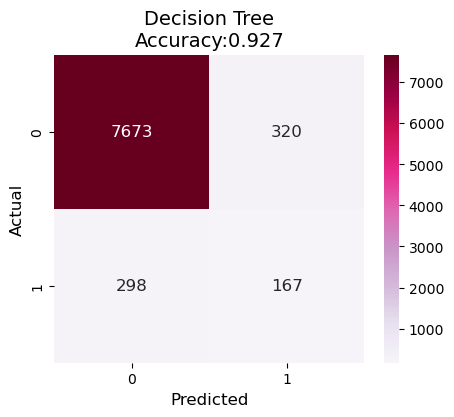

Classification Report
               precision    recall  f1-score   support

          no       0.96      0.96      0.96      7993
         yes       0.34      0.36      0.35       465

    accuracy                           0.93      8458
   macro avg       0.65      0.66      0.66      8458
weighted avg       0.93      0.93      0.93      8458



In [71]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

#melatih model dengan data training
model_dt.fit(X_train, y_train)

#melakukan prediksi pada data testing
y_pred_dt = model_dt.predict(X_test)

#membuat confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

#visualisasi confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt=".0f", cmap="PuRd", annot_kws={"fontsize": 12})
plt.title("Decision Tree\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_dt)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

#menampilkan classification report
print("Classification Report\n", classification_report(y_test, y_pred_dt))

# Random Forest

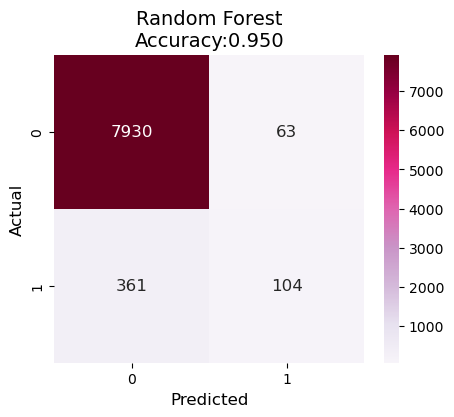

Classification Report
               precision    recall  f1-score   support

          no       0.96      0.99      0.97      7993
         yes       0.62      0.22      0.33       465

    accuracy                           0.95      8458
   macro avg       0.79      0.61      0.65      8458
weighted avg       0.94      0.95      0.94      8458



In [72]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

#melakukan prediksi pada data testing
y_pred_rf = model_rf.predict(X_test)

#membuat confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

#visualisasi confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt=".0f", cmap="PuRd", annot_kws={"fontsize": 12})
plt.title("Random Forest\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_rf)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

#menampilkan classification report
print("Classification Report\n", classification_report(y_test, y_pred_rf))

# Naive Bayes

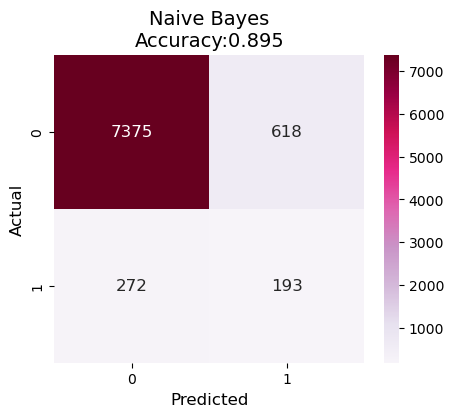

Classification Report
               precision    recall  f1-score   support

          no       0.96      0.92      0.94      7993
         yes       0.24      0.42      0.30       465

    accuracy                           0.89      8458
   macro avg       0.60      0.67      0.62      8458
weighted avg       0.92      0.89      0.91      8458



In [73]:
from sklearn.naive_bayes import GaussianNB

#inisialisasi model Naive Bayes
model_nb = GaussianNB()

#melatih model dengan data training
model_nb.fit(X_train, y_train)

#melakukan prediksi pada data testing
y_pred_nb = model_nb.predict(X_test)

#membuat confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

#visualisasi confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt=".0f", cmap="PuRd", annot_kws={"fontsize": 12})
plt.title("Naive Bayes\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_nb)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

#menampilkan classification report
print("Classification Report\n", classification_report(y_test, y_pred_nb))

# Kesimpulan
Setelah melakukan eksplorasi data, secara umum lebih banyak customer yang tidak berlangganan deposito berjangka. Berdasarkan pekerjaannya, ternyata customer dengan pekerjaan blue-collar jarang berlangganan atau subskripsi deposit berjangka, sedangkan customer dengan pekerjaan management lebih sering berlangganan. Lalu, berdasarkan status, customer dengan status telah menikah jarang berlangganan atau subskripsi deposit berjangka. Selanjutnya, berdasarkan jenis komunikasi, customer dengan jenis komunikasi cellular jarang berlangganan atau subskripsi deposit berjangka. Akhir kata, customer dengan usia yang sudah tua dan memiliki saldo tinggi cenderung berlangganan deposito berjangka.

Karena outputnya berupa tidak berlangganan dan berlangganan, maka dilakukan pemodelan klasifikasi, yaitu Logistic Regression, SVM, KNN, Decision Tree, Random Forest, dan Naive Bayes. Berdasarkan Classification Reportnya, model yang paling cocok dengan dataset yang digunakan adalah SVM dengan akurasi 94,9%.